# CTA

## CTA策略的配置价值在于长期低相关性与抗通胀性

### 长期低相关性

商品市场长期与股票、债券市场具有低相关性。为了验证，我们选取
- 股票：上证指数
- 债券：中债新指数
- 商品：中证商品指数(南华商品指数找不到)

In [1]:
import numpy as np
import pandas as pd
import akshare as ak

In [4]:
df_stock = ak.stock_a_all_pb()
df_stock = df_stock[['date', 'close']]

In [5]:
df_stock

,date,close
0,2005-01-04,1242.77
1,2005-01-05,1251.94
2,2005-01-06,1239.43
3,2005-01-07,1244.75
4,2005-01-10,1252.40
...,...,...
5032,2025-09-29,3828.17
5033,2025-09-30,3869.70
5034,2025-10-09,3898.31
5035,2025-10-10,3915.48


In [6]:
df_bond = ak.bond_new_composite_index_cbond()

In [7]:
df_bond

,date,value
0,2002-01-04,99.9731
1,2002-01-07,100.0149
2,2002-01-08,99.8273
3,2002-01-09,100.0203
4,2002-01-10,99.9317
...,...,...
5942,2025-09-30,247.6558
5943,2025-10-09,247.9217
5944,2025-10-10,247.8878
5945,2025-10-11,248.2685


南华的接口更新过 在akshare里找了好久 但是都不能用了 所以用了中证商品指数

In [8]:
# df_commodity = ak.futures_nh_return_index()
# df_commodity = ak.futures_nh_return_index("NHCI")
# df_commodity = ak.futures_return_index_nh(symbol='NHCI')

df_commodity= ak.futures_index_ccidx(symbol="中证商品期货指数")

In [9]:
df_commodity

,日期,指数代码,收盘点位,结算点位,涨跌,涨跌幅
0,2021-10-14,100001.CCI,1655.65,1643.51,-3.76,-0.23
1,2021-10-15,100001.CCI,1683.87,1667.29,23.78,1.45
2,2021-10-18,100001.CCI,1703.77,1689.09,21.80,1.31
3,2021-10-19,100001.CCI,1705.27,1701.15,12.06,0.71
4,2021-10-20,100001.CCI,1659.27,1670.91,-30.24,-1.78
...,...,...,...,...,...,...
964,2025-09-29,100001.CCI,2023.12,2021.68,0.23,0.01
965,2025-09-30,100001.CCI,2011.99,2016.66,-5.02,-0.25
966,2025-10-09,100001.CCI,2047.55,2040.88,24.22,1.20
967,2025-10-10,100001.CCI,2030.89,2044.33,3.45,0.17


时间上对的非常不齐。

In [84]:
# 把数据整合到一个dataframe里面

## 改名
df_stock.rename(columns={'close': 'stock'}, inplace=True)
df_commodity.rename(columns={'收盘点位': 'commodity', '日期': 'date'}, inplace=True)
df_bond.rename(columns={'value': 'bond'}, inplace=True)

## 整合
merged_df = pd.merge(df_stock[['date', 'stock']], df_commodity[['date', 'commodity']], on='date')
merged_df = pd.merge(merged_df, df_bond, on='date')
merged_df

,date,stock,commodity,bond
0,2021-10-14,3558.28,1655.65,209.5704
1,2021-10-15,3572.37,1683.87,209.5068
2,2021-10-18,3568.14,1703.77,209.1384
3,2021-10-19,3593.15,1705.27,209.1928
4,2021-10-20,3587.00,1659.27,209.2925
...,...,...,...,...
957,2025-09-29,3828.17,2023.12,247.5304
958,2025-09-30,3869.70,2011.99,247.6558
959,2025-10-09,3898.31,2047.55,247.9217
960,2025-10-10,3915.48,2030.89,247.8878


In [85]:
merged_df['date'] = pd.to_datetime(merged_df['date'])
merged_df.set_index('date', inplace=True)
merged_df

,stock,commodity,bond
date,,,
2021-10-14,3558.28,1655.65,209.5704
2021-10-15,3572.37,1683.87,209.5068
2021-10-18,3568.14,1703.77,209.1384
2021-10-19,3593.15,1705.27,209.1928
2021-10-20,3587.00,1659.27,209.2925
...,...,...,...
2025-09-29,3828.17,2023.12,247.5304
2025-09-30,3869.70,2011.99,247.6558
2025-10-09,3898.31,2047.55,247.9217


### 低相关性1：计算相关性并且画图

先把数据转成收益率，用`.pct_change()`方法，其中pct居然是percentage的缩写。

In [15]:
df_pct = merged_df.pct_change().dropna()
df_pct

,stock,commodity,bond
date,,,
2021-10-15,0.003960,0.017045,-0.000303
2021-10-18,-0.001184,0.011818,-0.001758
2021-10-19,0.007009,0.000880,0.000260
2021-10-20,-0.001712,-0.026975,0.000477
2021-10-21,0.002169,-0.019478,0.000552
...,...,...,...
2025-09-29,-0.003044,0.001718,-0.000163
2025-09-30,0.010849,-0.005501,0.000507
2025-10-09,0.007393,0.017674,0.001074


接下来要计算相关性，我的目标是将每个日期索引的数据计算相关性，所以用`.rolling()`方法，其中window是窗口大小，我这里设置滚动窗口为window。

In [20]:
window = 250
df_corr_map = df_pct.rolling(window=250).corr().dropna()
df_corr_map

stock  commodity      bond
date                                               
2022-11-01 stock      1.000000   0.322867 -0.040623
           commodity  0.322867   1.000000 -0.128199
           bond      -0.040623  -0.128199  1.000000
2022-11-02 stock      1.000000   0.322629 -0.044040
           commodity  0.322629   1.000000 -0.125241
...                        ...        ...       ...
2025-10-10 commodity  0.363064   1.000000 -0.224426
           bond      -0.255578  -0.224426  1.000000
2025-10-13 stock      1.000000   0.351877 -0.263938
           commodity  0.351877   1.000000 -0.225897
           bond      -0.263938  -0.225897  1.000000

[2136 rows x 3 columns]

这其实是一个multiindex的dataframe，其中第一层是日期，第二层是股票、债券、商品。

In [22]:
df_corr_map.loc['2022-11-01']

,stock,commodity,bond
stock,1.000000,0.322867,-0.040623
commodity,0.322867,1.000000,-0.128199
bond,-0.040623,-0.128199,1.000000


In [24]:
df_corr_map.loc['2022-11-01'].loc['stock']

stock        1.000000
commodity    0.322867
bond        -0.040623
Name: stock, dtype: float64

我们真正关心的是**商品和股票**、**商品和债券**的相关性。

In [63]:
commodity_corr_df = df_corr_map.iloc[range(1, len(df_corr_map), 3)]
commodity_corr_df

,,stock,commodity,bond
date,,,,
2022-11-01,commodity,0.322867,1.0,-0.128199
2022-11-02,commodity,0.322629,1.0,-0.125241
2022-11-03,commodity,0.323238,1.0,-0.115769
2022-11-04,commodity,0.329549,1.0,-0.121509
2022-11-07,commodity,0.331357,1.0,-0.118305
...,...,...,...,...
2025-09-29,commodity,0.384653,1.0,-0.240130
2025-09-30,commodity,0.380465,1.0,-0.241481
2025-10-09,commodity,0.380316,1.0,-0.228984


In [64]:
commodity_corr_df.reset_index(inplace=True)
commodity_corr_df

,date,level_1,stock,commodity,bond
0,2022-11-01,commodity,0.322867,1.0,-0.128199
1,2022-11-02,commodity,0.322629,1.0,-0.125241
2,2022-11-03,commodity,0.323238,1.0,-0.115769
3,2022-11-04,commodity,0.329549,1.0,-0.121509
4,2022-11-07,commodity,0.331357,1.0,-0.118305
...,...,...,...,...,...
707,2025-09-29,commodity,0.384653,1.0,-0.240130
708,2025-09-30,commodity,0.380465,1.0,-0.241481
709,2025-10-09,commodity,0.380316,1.0,-0.228984
710,2025-10-10,commodity,0.363064,1.0,-0.224426


In [65]:
commodity_corr_df.drop(columns=['level_1'], inplace=True)
commodity_corr_df.set_index('date', inplace=True)

C:\Users\杉嶋桐惠\AppData\Local\Temp\ipykernel_29128\4248961895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commodity_corr_df.drop(columns=['level_1'], inplace=True)


In [66]:
commodity_corr_df

,stock,commodity,bond
date,,,
2022-11-01,0.322867,1.0,-0.128199
2022-11-02,0.322629,1.0,-0.125241
2022-11-03,0.323238,1.0,-0.115769
2022-11-04,0.329549,1.0,-0.121509
2022-11-07,0.331357,1.0,-0.118305
...,...,...,...
2025-09-29,0.384653,1.0,-0.240130
2025-09-30,0.380465,1.0,-0.241481
2025-10-09,0.380316,1.0,-0.228984


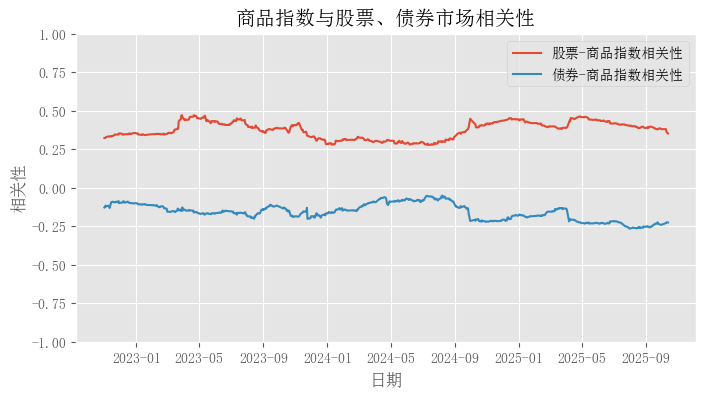

In [75]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'SimSun'
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')
fig,ax = plt.subplots(figsize=(8, 4))
ax.plot(commodity_corr_df['stock'], label='股票-商品指数相关性')
ax.plot(commodity_corr_df['bond'], label='债券-商品指数相关性')
ax.set_title('商品指数与股票、债券市场相关性')
ax.set_xlabel('日期')
ax.set_ylabel('相关性')
ax.set_ylim(-1, 1)
ax.legend()
plt.show()

### 低相关性2：投资组合中采用商品期货指数能提高夏普

分别计算年化收益率，年化波动率与年化夏普比

\begin{align*}
(1+r)^n = \frac{P_t}{P_0} \\
\text{即} \quad r = \left( \frac{P_t}{P_0} \right)^{ \frac{1}{n} } - 1 \\
\end{align*}

In [86]:
merged_df.reset_index(inplace=True)
merged_df

,date,stock,commodity,bond
0,2021-10-14,3558.28,1655.65,209.5704
1,2021-10-15,3572.37,1683.87,209.5068
2,2021-10-18,3568.14,1703.77,209.1384
3,2021-10-19,3593.15,1705.27,209.1928
4,2021-10-20,3587.00,1659.27,209.2925
...,...,...,...,...
957,2025-09-29,3828.17,2023.12,247.5304
958,2025-09-30,3869.70,2011.99,247.6558
959,2025-10-09,3898.31,2047.55,247.9217
960,2025-10-10,3915.48,2030.89,247.8878


In [97]:
merged_df['date'].dt.year

0      2021
1      2021
2      2021
3      2021
4      2021
       ... 
957    2025
958    2025
959    2025
960    2025
961    2025
Name: date, Length: 962, dtype: int32

使用 `.dt.year` 方法返回 `pd.datetime` 的年份 由此可以确定每一年的价格

In [101]:
pd.Series(merged_df['date'].dt.year).unique()

array([2021, 2022, 2023, 2024, 2025])

#### 年化收益

In [147]:
_ = merged_df[merged_df['date'].dt.year == 2021]
price_start, price_final = _.iloc[0], _.iloc[-1]
num_year = 5

yield_yearly = ( price_final['commodity'] / price_start['commodity'] ) ** ( 1 / num_year ) - 1
yield_yearly

-0.01226468290725069

#### 年化波动率

接下来计算**年化波动率**
$$
\text{年化波动率} = \text{std(收益率序列)} \times \sqrt{ \frac{天数}{252} }
$$
其中我们直接使用 `df_pct`

In [146]:
volatility_yearly = df_pct.std() * np.sqrt(len(df_pct) / 252)
volatility_yearly

stock        0.019876
commodity    0.018678
bond         0.001389
dtype: float64

#### 年化夏普比

$$
\text{sharpe} = \frac{ \text{年化收益率} - \text{年化无风险利率} }{\text{策略年化波动率}}
$$

取无风险利率为 $3\%$ 。

In [149]:
sharpe_yearly= (yield_yearly - 0.03) / volatility_yearly
sharpe_yearly

stock        -2.126406
commodity    -2.262748
bond        -30.423034
dtype: float64

### 投资组合的风险分散能力

- 60/40股债组合
- 10%商品+90%股债组合

In [150]:
merged_df['stock-bond'] = 0.6 * merged_df['stock'] + 0.4 * merged_df['bond']
merged_df['commodity-stock-bond'] = 0.1 * merged_df['commodity'] + 0.9 * merged_df['stock-bond']
merged_df

,date,stock,commodity,bond,stock-bond,commodity-stock-bond
0,2021-10-14,3558.28,1655.65,209.5704,2218.79616,2162.481544
1,2021-10-15,3572.37,1683.87,209.5068,2227.22472,2172.889248
2,2021-10-18,3568.14,1703.77,209.1384,2224.53936,2172.462424
3,2021-10-19,3593.15,1705.27,209.1928,2239.56712,2186.137408
4,2021-10-20,3587.00,1659.27,209.2925,2235.91700,2178.252300
...,...,...,...,...,...,...
957,2025-09-29,3828.17,2023.12,247.5304,2395.91416,2358.634744
958,2025-09-30,3869.70,2011.99,247.6558,2420.88232,2379.993088
959,2025-10-09,3898.31,2047.55,247.9217,2438.15468,2399.094212
960,2025-10-10,3915.48,2030.89,247.8878,2448.44312,2406.687808


In [151]:
df_pct_new = merged_df.iloc[:,1:].pct_change().dropna()
df_pct_new

,stock,commodity,bond,stock-bond,commodity-stock-bond
1,0.003960,0.017045,-0.000303,0.003799,0.004813
2,-0.001184,0.011818,-0.001758,-0.001206,-0.000196
3,0.007009,0.000880,0.000260,0.006755,0.006295
4,-0.001712,-0.026975,0.000477,-0.001630,-0.003607
5,0.002169,-0.019478,0.000552,0.002108,0.000464
...,...,...,...,...,...
957,-0.003044,0.001718,-0.000163,-0.002926,-0.002529
958,0.010849,-0.005501,0.000507,0.010421,0.009055
959,0.007393,0.017674,0.001074,0.007135,0.008026
960,0.004404,-0.008137,-0.000137,0.004220,0.003165


对指标的计算暂时忽略了 因为和之前的代码是重复的 而且数据和研报里还不太一样。

### 抗通胀性

将资产收益率对时间滞后项做线性回归，看R2的大小。

> **资产池**：农产品、能化、贵金属、有色金属、黑色、上证50、沪深300、中证500、中证1000、国债、信用债、金融债